<a href="https://colab.research.google.com/github/shubham2637/Handwritten-OCR-models-keras/blob/master/ALL_ICR_35_98_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file = "/content/drive/My Drive/ICRdata.rar"
!pip install rarfile
!pip install patool
from patoolib import extract_archive
import os
extract_to = 'ICR'
os.mkdir(extract_to) 
extract_archive(file, outdir=extract_to)

     |████████████████████████████████| 122kB 9.4MB/s 
  Created wheel for rarfile: filename=rarfile-3.1-cp36-none-any.whl size=24908 sha256=22894a7a450a355012a937ae4c0e600c8d6c36671f614dcc98ef7e5f52d1428e
  Stored in directory: /root/.cache/pip/wheels/23/3c/c8/0215b6a5079492eff3be3f545ae0b0c4a66734c35c9e444eac
Successfully built rarfile
     |████████████████████████████████| 81kB 5.0MB/s 
patool: Extracting /content/drive/My Drive/ICRdata.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/ICRdata.rar"
patool:     with cwd='ICR'
patool: ... /content/drive/My Drive/ICRdata.rar extracted to `ICR'.


'ICR'

In [0]:
#import tensorflow as tf

In [0]:
data_dir = '/content/ICR/ddd'

In [66]:
os.listdir(data_dir)

['test', 'train']

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:

test_path = data_dir+"/test/"
train_path = data_dir+"/train/"

In [69]:
os.listdir(test_path)

['Z',
 'S',
 '3',
 'L',
 'F',
 '4',
 'N',
 'Q',
 'R',
 '9',
 'A',
 'O',
 'J',
 'M',
 'U',
 'G',
 'X',
 'Y',
 'T',
 'K',
 'C',
 'H',
 'W',
 'B',
 'D',
 '5',
 '2',
 'E',
 'P',
 '7',
 '6',
 'V',
 '8',
 'I',
 '1']

In [0]:
num_classes = len(os.listdir(train_path))

In [72]:
os.listdir(train_path+'Q')[-1]

'Q-4224.png'

In [0]:
image_1_file_location =train_path+'Q/'+ os.listdir(train_path+'Q')[10]

In [74]:
image_1_file_location

'/content/ICR/ddd/train/Q/Q-3466.png'

In [75]:
imread(image_1_file_location).shape

(28, 28)

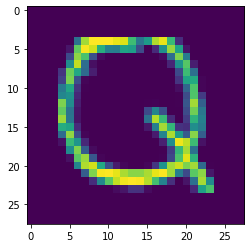

In [76]:
plt.imshow(imread(image_1_file_location))

In [0]:
image_shape = (28,28,1)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
#image_gen.flow_from_directory(train_path)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,AveragePooling2D

In [0]:
model = Sequential()
# Step 1 - Convolution layer 1
model.add(Conv2D(64, (2, 2), padding='same', input_shape = image_shape, activation = 'relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
model.add(Conv2D(128, (2, 2), padding='same', activation = 'relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
model.add(Conv2D(256, (2, 2), padding='same', activation = 'relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
model.add(Flatten())
# Step 4 - Full connection
#model.add(Dense(units = 512, activation = 'relu'))
#model.add(Dropout(0.5)) 
model.add(Dense(units = num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [0]:
batch_size = 256

In [85]:
train_image_gen = train_datagen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 425691 images belonging to 35 classes.


In [86]:
test_image_gen = test_datagen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 2661 images belonging to 35 classes.


In [87]:
train_image_gen.class_indices

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

#Uncomment tO train model

In [88]:
results = model.fit(train_image_gen,
                              epochs=1024,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/1024
1663/1663 [==============================] - 79s 47ms/step - loss: 0.2449 - acc: 0.9330 - val_loss: 1.5355 - val_acc: 0.5825
Epoch 2/1024
1663/1663 [==============================] - 76s 46ms/step - loss: 0.0646 - acc: 0.9816 - val_loss: 0.9079 - val_acc: 0.7366
Epoch 3/1024
1663/1663 [==============================] - 76s 45ms/step - loss: 0.0465 - acc: 0.9867 - val_loss: 0.5783 - val_acc: 0.8320
Epoch 4/1024
1663/1663 [==============================] - 75s 45ms/step - loss: 0.0353 - acc: 0.9894 - val_loss: 0.4921 - val_acc: 0.8546
Epoch 5/1024
1663/1663 [==============================] - 74s 44ms/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.3180 - val_acc: 0.8963
Epoch 6/1024
1663/1663 [==============================] - 73s 44ms/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.2783 - val_acc: 0.9237
Epoch 7/1024
1663/1663 [==============================] - 73s 44ms/step - loss: 0.0181 - acc: 0.9941 - val_loss: 0.2961 - val_acc: 0.9211
Epoch 8/1024
1663/1663 [==========

In [0]:
import tensorflow as tf

#loading the model

In [0]:
#model = tf.keras.models.load_model('/content/drive/My Drive/trained_models/ICR/final_ICR _91_69')

In [0]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model Evaluations


In [0]:
test_image_gen.reset()

#Saving the model

In [0]:
model.save('final_ICR')

In [94]:
model.evaluate_generator(test_image_gen)

[0.05795692322267727, 0.98684704]

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 64)        16448     
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       32896     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       65664     
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 128)        

In [0]:
#test_image_gen=  train_image_gen

In [97]:
model.metrics_names

['loss', 'acc']

In [98]:
scores = model.evaluate(test_image_gen, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("CNN Acuracy: %.2f%%" % (scores[1]*100))

11/11 [==============================] - 1s 78ms/step - loss: 0.0580 - acc: 0.9868
CNN Error: 1.32%
CNN Acuracy: 98.68%


In [0]:
#pred = model.predict_generator(test_image_gen)

In [100]:
pred= model.predict_generator(test_image_gen)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_image_gen.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[ 0  0  0 ... 34 34 34]
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predicted_class_indices, test_image_gen.classes))

[[94  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 25  0]
 [ 0  0  0 ...  0  0 11]]


In [102]:
print(classification_report(test_image_gen.classes,predicted_class_indices))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        63
           2       0.97      1.00      0.99        72
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        20
           7       0.98      1.00      0.99        54
           8       0.98      1.00      0.99        55
           9       0.97      0.99      0.98        70
          10       0.99      0.99      0.99       706
          11       1.00      1.00      1.00        24
          12       0.95      0.98      0.97       358
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        11
          16       0.94      0.94      0.94        18
          17       1.00    

In [103]:
test_image_gen.classes.shape

(2661,)

In [0]:
#print(classification_report(test_image_gen.classes,predictions))

In [0]:
from tensorflow.keras.preprocessing import image

In [106]:
my_image = image.load_img(image_1_file_location,target_size=image_shape,grayscale=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [107]:
my_image

In [108]:
my_image_arr = image.img_to_array(my_image)
my_image_arr.shape

(28, 28, 1)

In [109]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)
my_image_arr.shape

(1, 28, 28, 1)

## Input size of image (1, 28, 28, 1)

In [0]:
 p = model.predict_classes(my_image_arr)

In [0]:
#train_image_gen.class_indices

In [112]:
labels2[p[0]]

'Q'

In [113]:
print(f"Predicted Label is {labels2[p[0]]}")

Predicted Label is Q


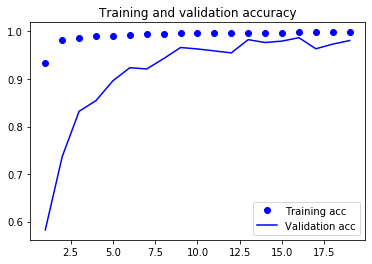

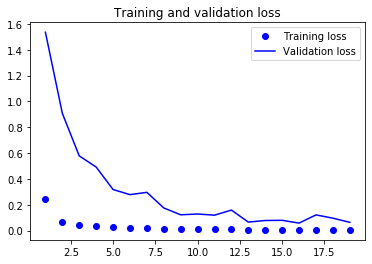

In [114]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [115]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,0.244960,0.932958,1.535478,0.582488
1,0.064596,0.981557,0.907872,0.736565
2,0.046490,0.986725,0.578347,0.832018
3,0.035348,0.989384,0.492143,0.854566
4,0.028074,0.991409,0.317982,0.896280
5,0.022711,0.992671,0.278342,0.923713
6,0.018140,0.994052,0.296109,0.921082
7,0.014957,0.995008,0.175227,0.942879
8,0.012702,0.995720,0.122298,0.966178
9,0.011188,0.996305,0.128347,0.963172


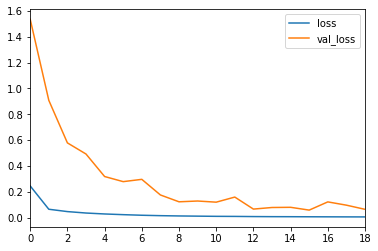

In [116]:
metrics[['loss','val_loss']].plot()

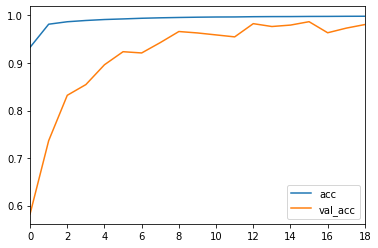

In [117]:
metrics[['acc','val_acc']].plot()